Presidential Approval Ratings - To collect data of Presidential Approval Ratings from CSV Files. 
Source:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime



In [2]:
# Created a path for the files
Data_Path = f"Approval Rating Data/American Presidency Project - Approval Ratings for POTUS - "

# Created a list of presidents to accomidate for the data files names
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
             "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]

#Empty dictionary to collect presidents and their ratings
Ratings = {}

for names in Presidents:
    #Grabbed each file and appended the dataframe of each president
    #Each president has their own dataset in the dictionary "Ratings"
    File_Path = f"{Data_Path}{names}.csv"
    President_Ratings = pd.read_csv(File_Path)
    Ratings.update({names:President_Ratings})
    
    #Changed the dates from the source files to datetime objects
    Ratings[names]["End Date"] = pd.to_datetime(Ratings[names]["End Date"])
    Ratings[names]["Start Date"] = pd.to_datetime(Ratings[names]["Start Date"])
    
    #For each president's dataframe, created a column to separate years and month so it can be easier to use in other analysis
    Ratings[names]["Year"]=Ratings[names]["End Date"].dt.year
    Ratings[names]["Month"]=Ratings[names]["End Date"].dt.month
    
    #Created a cleaned data CSV file for each president.
    Ratings[names].to_csv(f"Cleaned President Ratings/{names}-Ratings.csv",index = False)





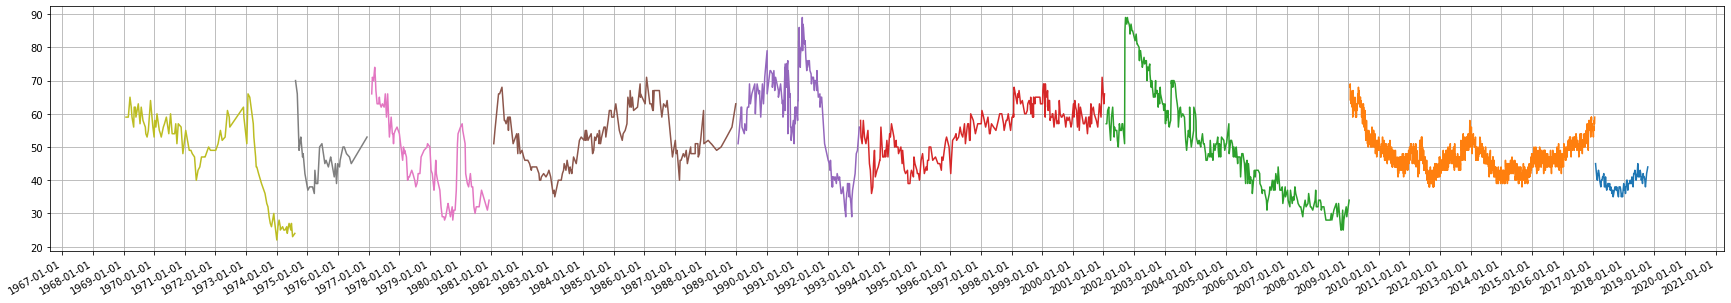

In [8]:
#Preview of how the outcome looks.
plt.figure(figsize = (30,5))
for names in Presidents:
    plt.plot(Ratings[names]["End Date"],Ratings[names]["Approving"])
    plt.xticks(rotation=45)
    years = dates.YearLocator()
    plt.gca().xaxis.set_major_locator(years)
#     plt.gca().xaxis.set_minor_locator(dates.MonthLocator())
#     plt.gcf().autofmt_xdate()
    plt.grid(True)
    
plt.show()
